In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
# for covariance
from numpy import cov
# for correlation
from scipy.stats import pearsonr
from scipy.stats import skew
import scipy.stats as stats
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
plt.style.use('seaborn')
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Documents/COS736/ElsiesRiver.csv')

In [3]:
data.head(5)

,created_at,entry_id,PM1.0_CF1,PM2.5_CF1,PM10.0_CF1,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM
0,2021-09-01 00:01:10 UTC,166927,0.0,0.39,0.56,13923,-76,55,56,0.39
1,2021-09-01 00:03:08 UTC,166928,0.2,0.59,0.59,13925,-77,55,56,0.59
2,2021-09-01 00:05:08 UTC,166929,0.0,0.45,0.93,13927,-76,55,55,0.45
3,2021-09-01 00:07:08 UTC,166930,0.0,0.22,0.49,13929,-76,55,56,0.22
4,2021-09-01 00:09:09 UTC,166931,0.0,0.11,0.53,13931,-77,55,56,0.11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172110 entries, 0 to 172109
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   created_at     172110 non-null  object 
 1   entry_id       172110 non-null  int64  
 2   PM1.0_CF1      172110 non-null  float64
 3   PM2.5_CF1      172110 non-null  float64
 4   PM10.0_CF1     172110 non-null  float64
 5   UptimeMinutes  172110 non-null  int64  
 6   RSSI_dbm       172110 non-null  int64  
 7   Temperature_F  172110 non-null  int64  
 8   Humidity_%     172110 non-null  int64  
 9   PM2.5_ATM      172110 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 13.1+ MB


In [5]:
data.isnull().sum()

created_at       0
entry_id         0
PM1.0_CF1        0
PM2.5_CF1        0
PM10.0_CF1       0
UptimeMinutes    0
RSSI_dbm         0
Temperature_F    0
Humidity_%       0
PM2.5_ATM        0
dtype: int64

In [6]:
data.describe()

,entry_id,PM1.0_CF1,PM2.5_CF1,PM10.0_CF1,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM
count,172110.000000,172110.000000,172110.000000,172110.000000,172110.000000,172110.000000,172110.000000,172110.000000,172110.000000
mean,252981.500000,6.769076,9.956687,10.958642,13767.748748,-54.550084,72.122346,52.060386,9.066440
std,49684.021752,12.034865,17.235447,18.819384,10739.632436,8.306362,8.136134,12.008256,12.732243
min,166927.000000,0.000000,0.000000,0.000000,1.000000,-87.000000,47.000000,9.000000,0.000000
25%,209954.250000,1.140000,2.230000,2.720000,4675.250000,-56.000000,66.000000,44.000000,2.230000
50%,252981.500000,3.210000,5.160000,5.920000,11067.000000,-52.000000,71.000000,53.000000,5.160000
75%,296008.750000,6.980000,10.340000,11.440000,21550.500000,-50.000000,77.000000,61.000000,10.340000
max,339036.000000,389.880000,1090.310000,1631.840000,44644.000000,-41.000000,103.000000,81.000000,726.120000


<AxesSubplot:title={'center':'Density Plot'}, xlabel='Temperature_F', ylabel='Density'>

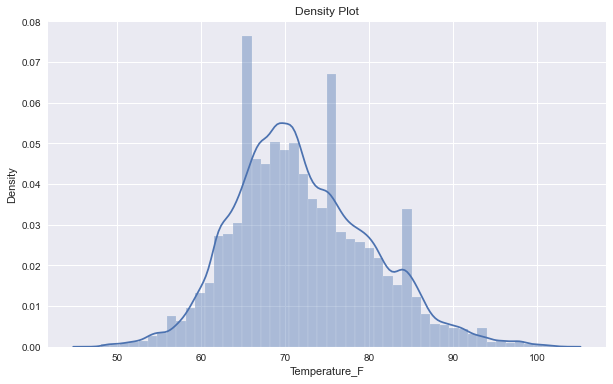

In [7]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel('Temperature_F')
plt.ylabel('Density')
plt.title('Density Plot')
sns.distplot(data['Temperature_F'])

Text(0.5, 1.0, 'Density plot of the Temperature_F and Humidity_%.')

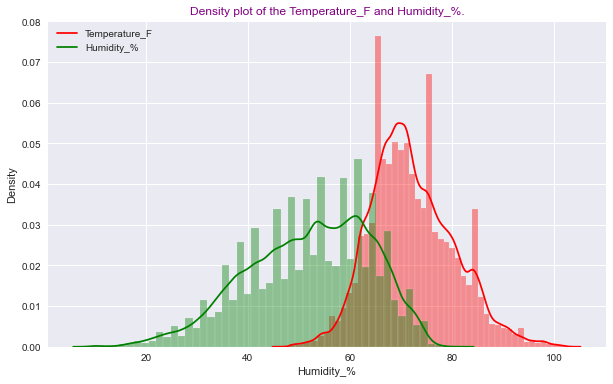

In [8]:
import seaborn as sns
from matplotlib import style

sns.distplot(data["Temperature_F"], color="red")
sns.distplot(data["Humidity_%"], color="green")
plt.legend(['Temperature_F', 'Humidity_%'], loc='upper left')
plt.title("Density plot of the Temperature_F and Humidity_%.", color="purple")

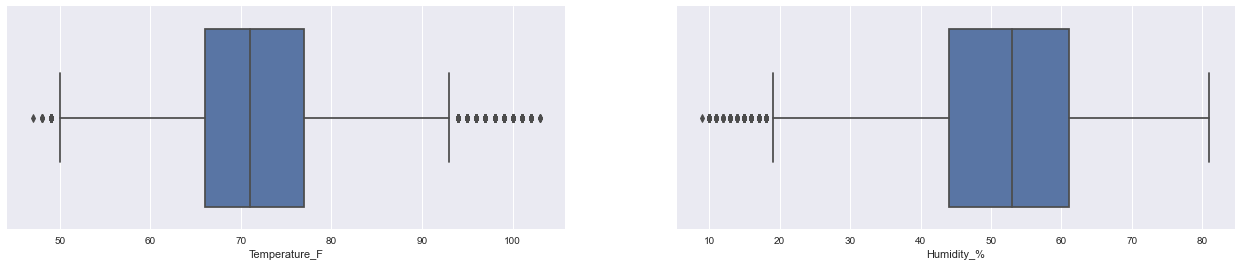

In [9]:
Temperature_F = data[['Temperature_F', 'Humidity_%']]
number_of_columns = len(Temperature_F.columns)
plt.rcParams['figure.figsize'] = (22, 9)
for category in range(0,number_of_columns):
    plt.subplot(2 ,number_of_columns ,category+1)
    sns.boxplot(Temperature_F[Temperature_F.columns[category]], orient='v')

<AxesSubplot:title={'center':'CORRELATION PLOT'}>

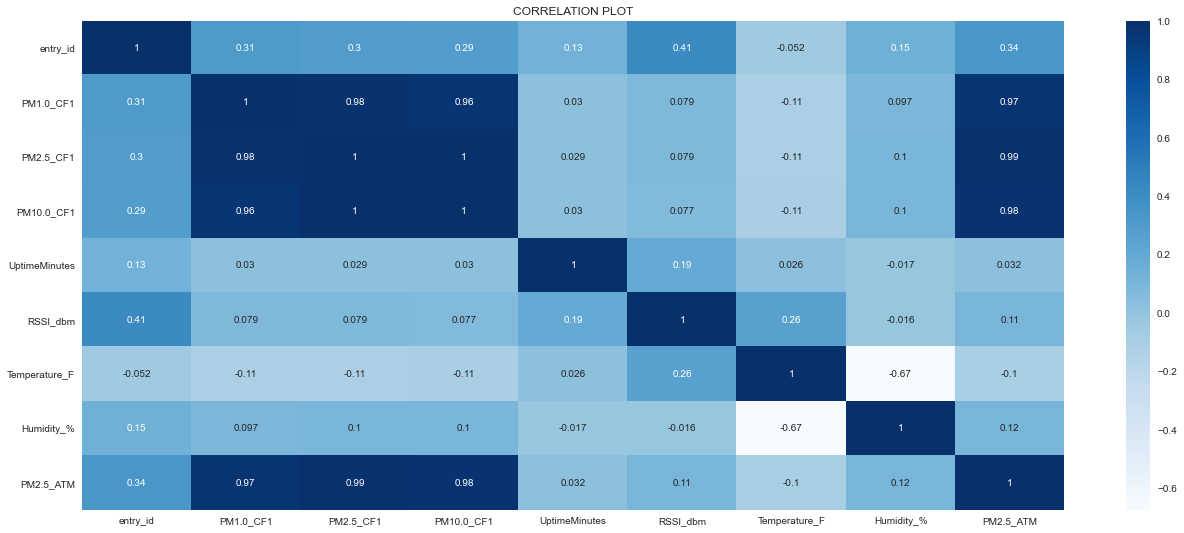

In [10]:
plt.title('CORRELATION PLOT')
plt.rcParams['figure.figsize'] = (10, 2)
sns.heatmap(data.corr(), annot= True, cmap = 'Blues', fmt='.2g')

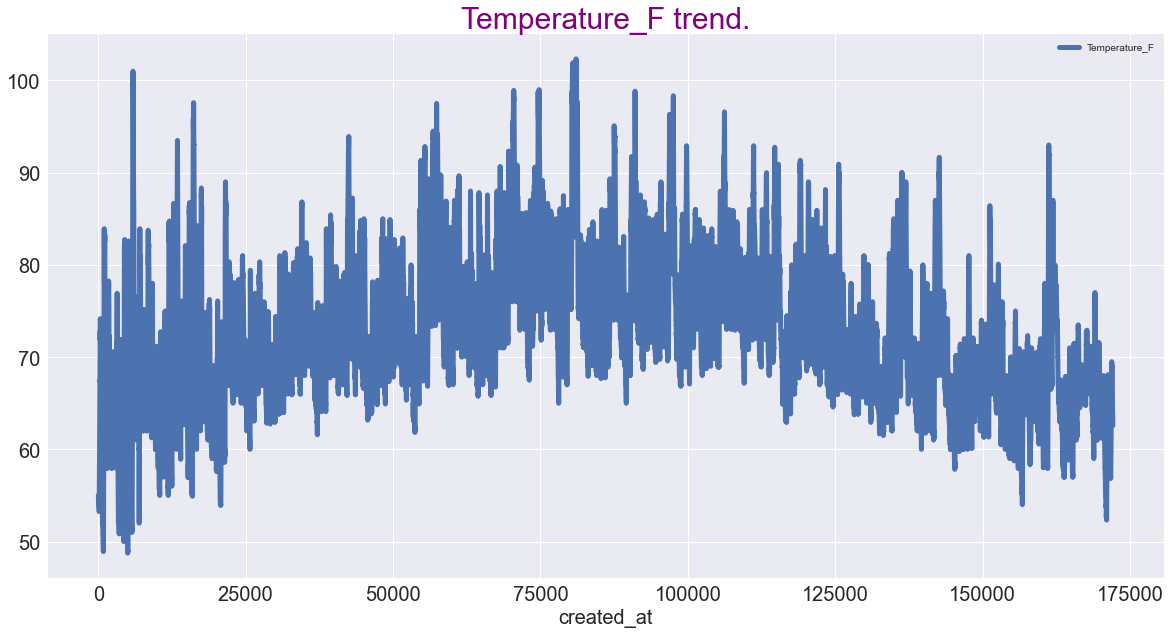

In [11]:
datae = data[['Temperature_F']]
datae.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('created_at', fontsize=20)
plt.title("Temperature_F trend.", color="purple", fontsize=30);

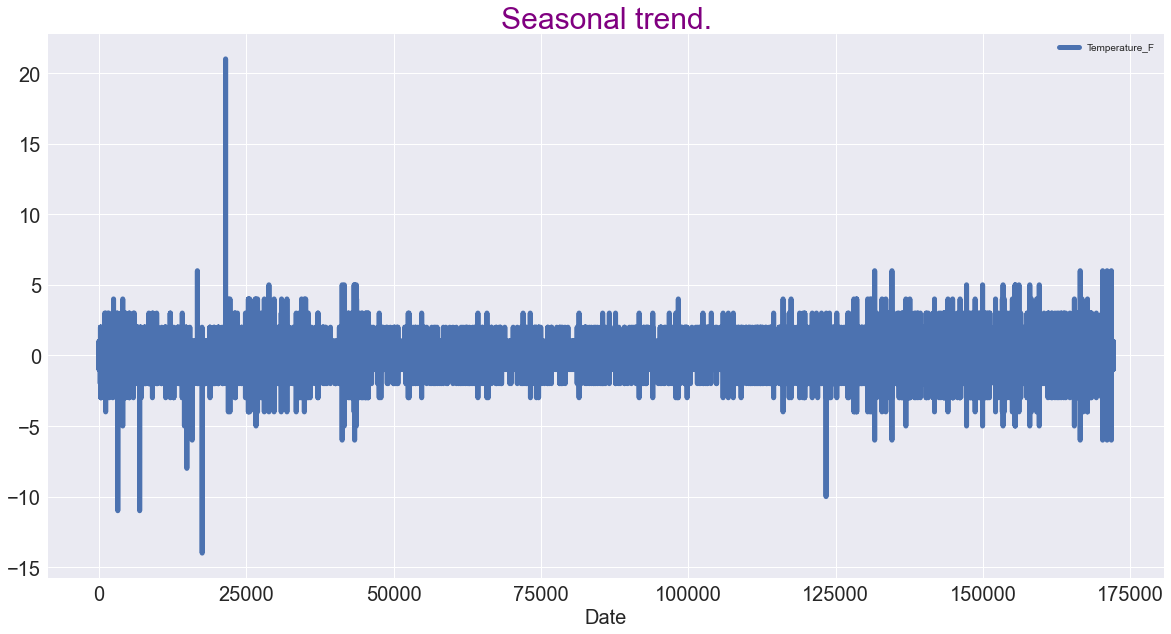

In [12]:
datae.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title("Seasonal trend.", color="purple", fontsize=30);

<AxesSubplot:xlabel='created_at', ylabel='Temperature_F'>

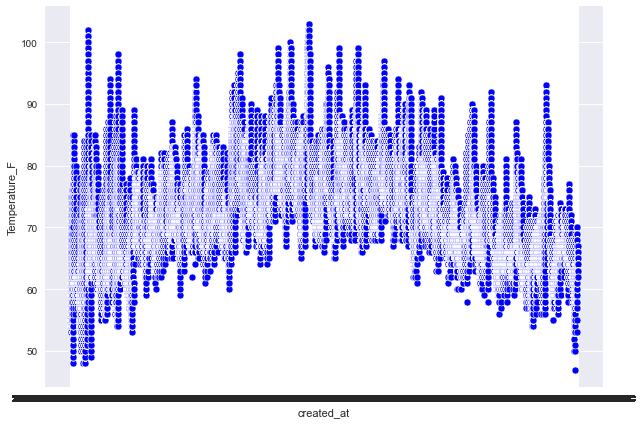

In [13]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(data['created_at'],data['Temperature_F'], color= "Blue" )

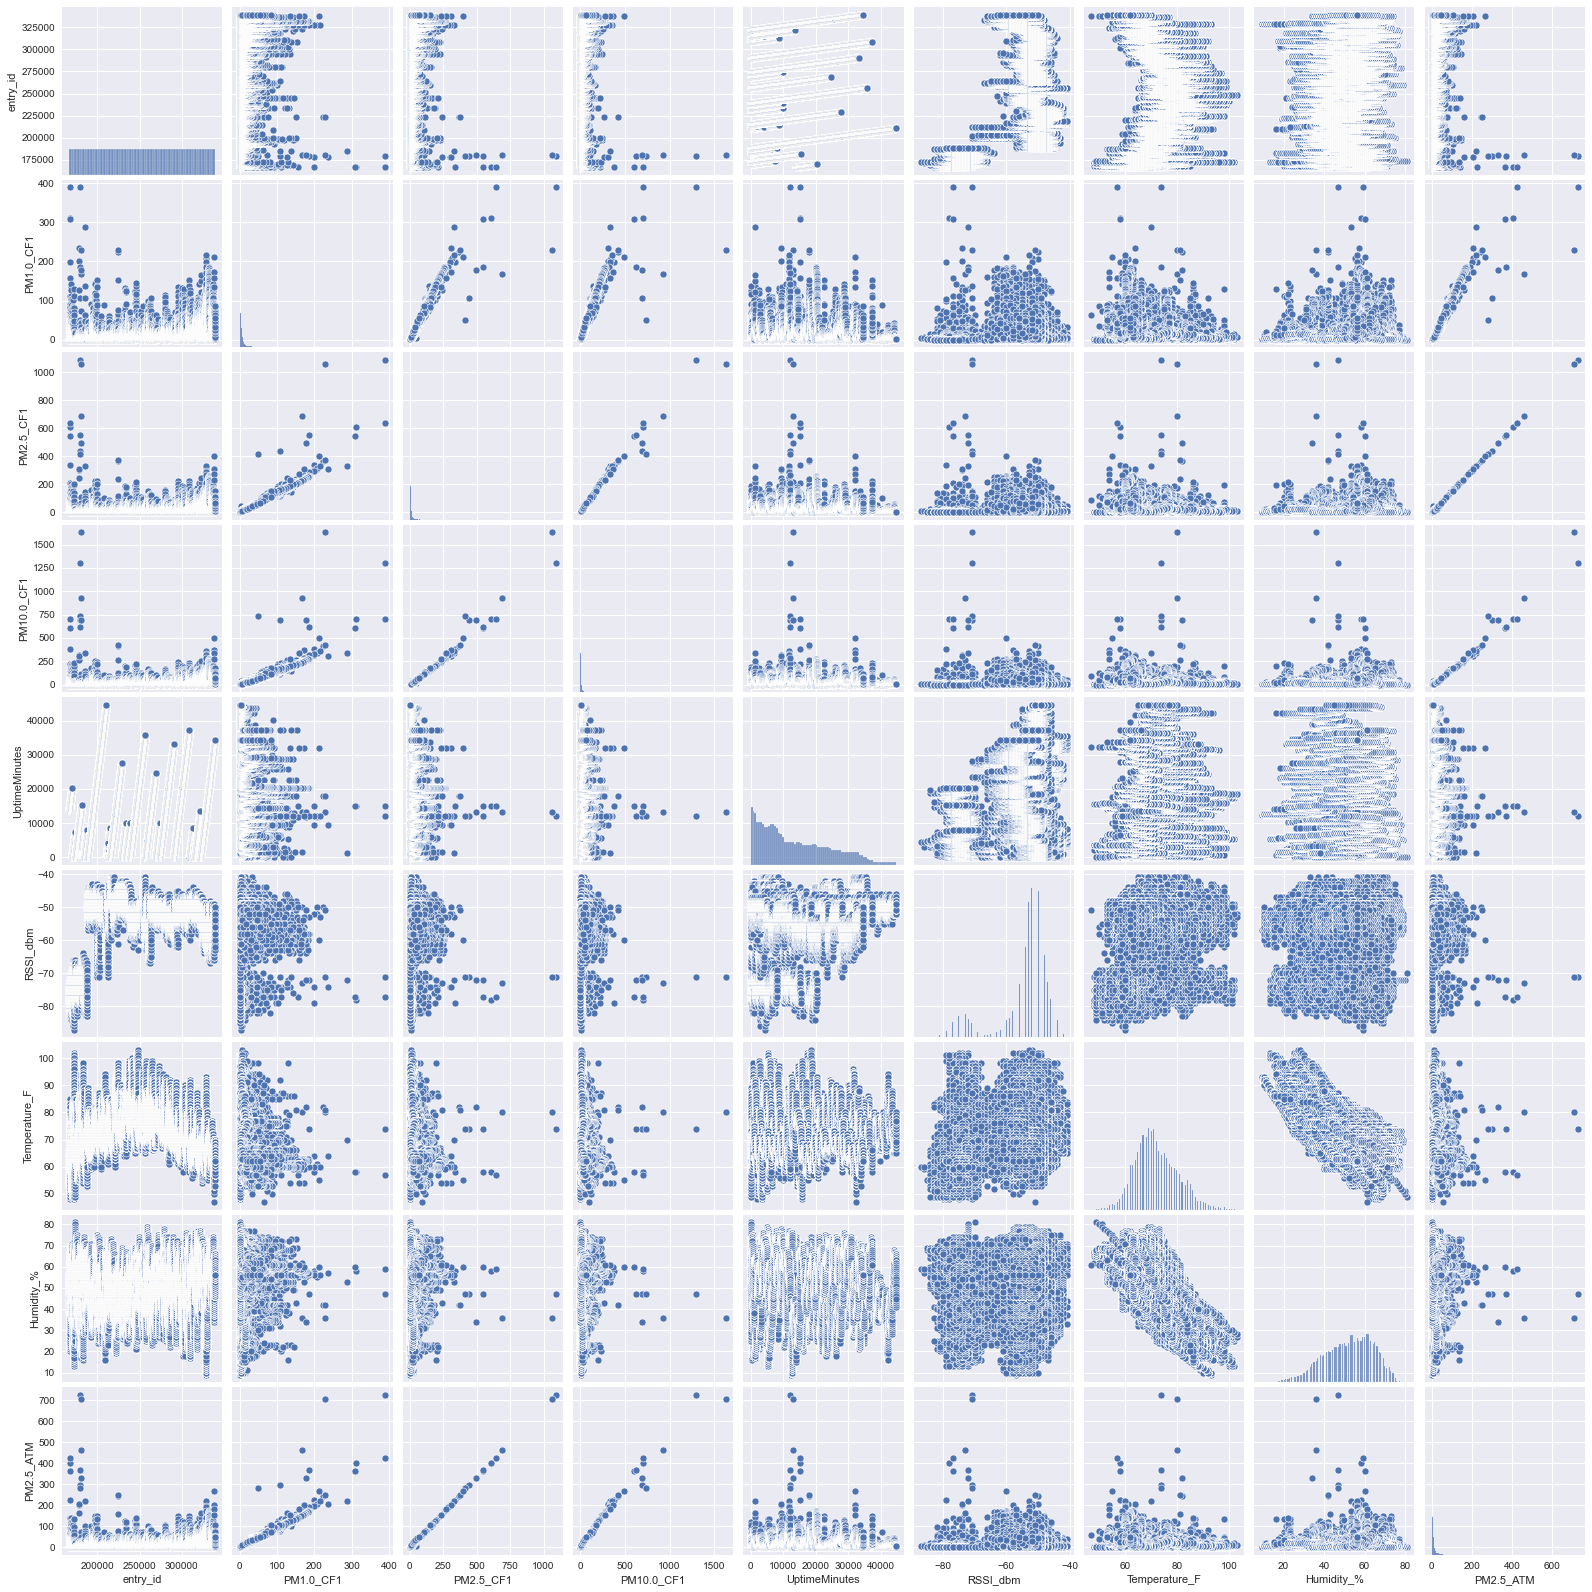

In [14]:
sns.pairplot(data)